In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load Data from csv
filePath = 'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv'
df = pd.read_csv(filePath)

In [2]:
# Check versions
print(pd.__version__)
print(np.__version__)
print(mpl.__version__)


1.3.5
1.21.5
3.5.1


1. How many different companies are represented in the data set?

In [3]:
CompanyNames = df['Company Name'].unique()
numCompanies = len(CompanyNames)
print('There are ' + str(numCompanies) + ' unique companies in this data set')

There are 439 unique companies in this data set


2. What is the total number of jobs created for businesses in Queens?

In [4]:
dfQueens = df.loc[(df['Borough'] == 'Queens')]
queensJC = dfQueens['Job created']
queensJC = [0 if pd.isnull(x) else x for x in queensJC]
print('The total number of jobs created in Queens is ' + str(sum(queensJC)))

The total number of jobs created in Queens is 102.0


3. How many different unique email domains names are there in the data set?

In [5]:
emails = df['company email']

# Remove NaN
emails = [i for i in emails if (pd.isnull(i)) == False]

# Isloate Domains
emailsDomains = [x[x.find('@') + 1:] for x in emails]

# Find unique domains
uniqueDomains = pd.unique(emailsDomains)

print('This data set includes ' + str(len(uniqueDomains)) + ' unique email domains')

This data set includes 361 unique email domains


4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [6]:
# Make a new dataframe to prepare for the 5th step
TopNTAs = pd.DataFrame()

# Group Stats
TopNTAs['BusinessCount'] = df.groupby('NTA')['NTA'].count()
TopNTAs['AverageTotalSavings'] = df.groupby('NTA')['Total Savings'].mean()
TopNTAs['TotalJobsCreated'] = df.groupby('NTA')['Job created'].sum()

# Only take rows with # business >= 5
TopNTAs = TopNTAs.loc[TopNTAs["BusinessCount"] >= 5]
TopNTAs.head()

,BusinessCount,AverageTotalSavings,TotalJobsCreated
NTA,,,
Battery Park City-Lower Manhattan,9,469890.796667,0.0
Bushwick South,10,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,11,24337.390000,0.0
College Point,7,17159.372857,2.0
Crown Heights North,9,4036.298889,0.0


5. Save your result for the previous question as a CSV file.

In [7]:
TopNTAFilePath = 'Day4TopNTA.csv'
TopNTAs.to_csv(TopNTAFilePath)

1. Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

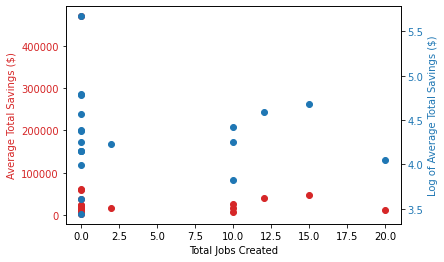

In [8]:
# Create a new variable for Log10of Average Total Savings
TopNTAs['AverageTotalSavingsLog'] = np.log10(TopNTAs['AverageTotalSavings'])

# Create Figure
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Total Jobs Created')
ax1.set_ylabel('Average Total Savings ($)', color = color)
ax1.scatter('TotalJobsCreated', 'AverageTotalSavings', c = color, data=TopNTAs)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Log of Average Total Savings ($)', color = color)
ax2.scatter('TotalJobsCreated', 'AverageTotalSavingsLog', c = color, data=TopNTAs)
ax2.tick_params(axis='y', labelcolor=color)

2. Create a histogram of the log of the average total savings.

Text(0.5, 0, 'Log of Average Total Savings ($)')

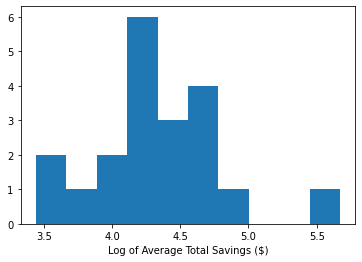

In [9]:
fig2, ax1 = plt.subplots()
ax1.hist('AverageTotalSavingsLog', data=TopNTAs)
ax1.set_xlabel('Log of Average Total Savings ($)')

3. Create a line plot of the total jobs created for each month.

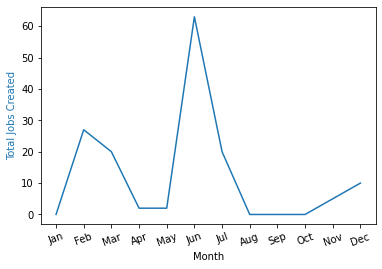

In [10]:
# Create new month Var
df['Month'] = pd.to_datetime(df['Effective Date']).dt.month

# Identify the number of new hires for each MonthYear variable
MonthNewHires = df.groupby('Month', as_index=False)['Job created'].sum()

# Plot the line over time
fig3, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Jobs Created', color = color)
ax1.plot('Month', 'Job created', c = color, data= MonthNewHires)
plt.xticks(np.arange(1, 13, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation = 20);